
=== Subject 2: NDARINV03KMHMJJ ===
Original T1w:


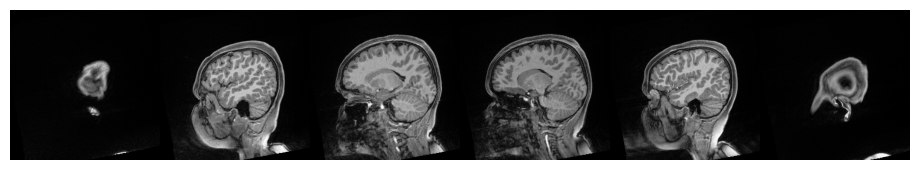

Original T2w:


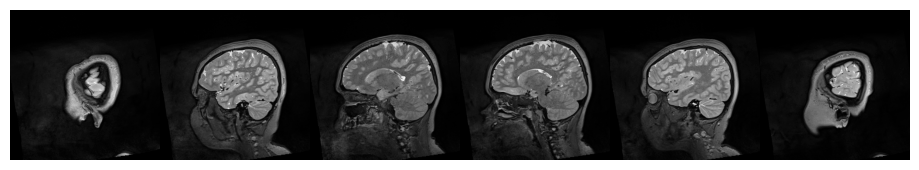

Processed T1 (channel 0):


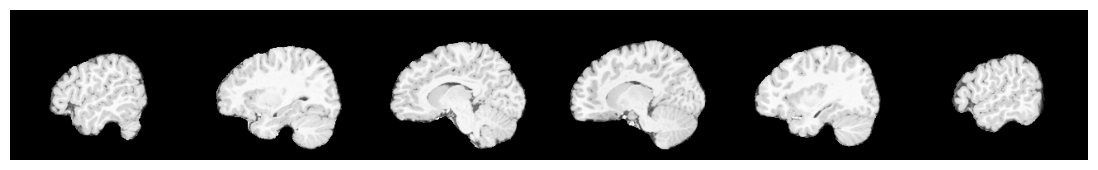

Processed T2 (channel 1):


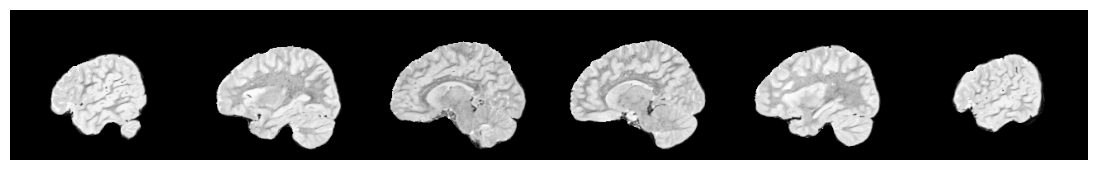


=== Subject 3: NDARINV09AUXBBT ===
Original T1w:


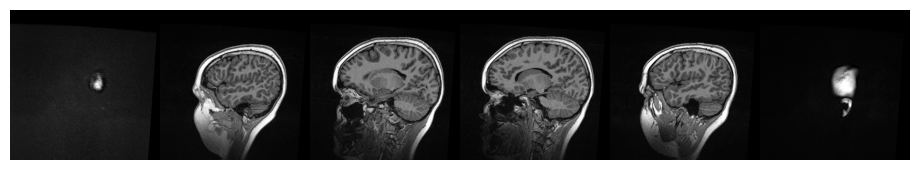

Original T2w:


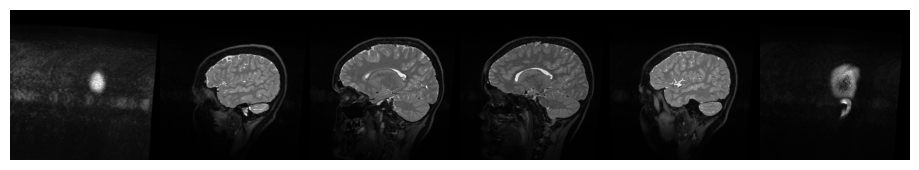

Processed T1 (channel 0):


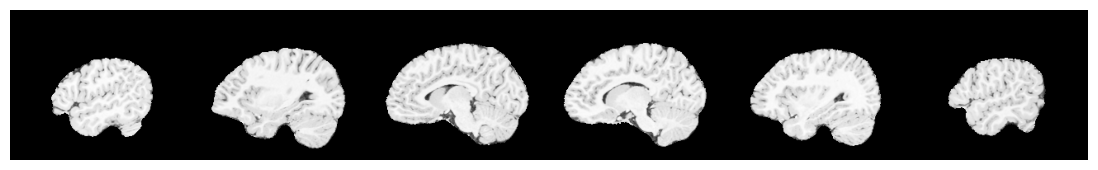

Processed T2 (channel 1):


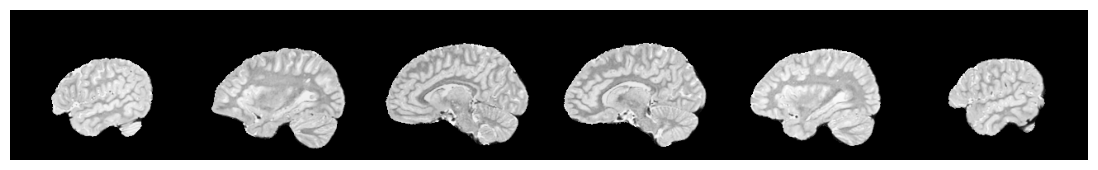


=== Subject 4: NDARINV0H2AWWPU ===
Original T1w:


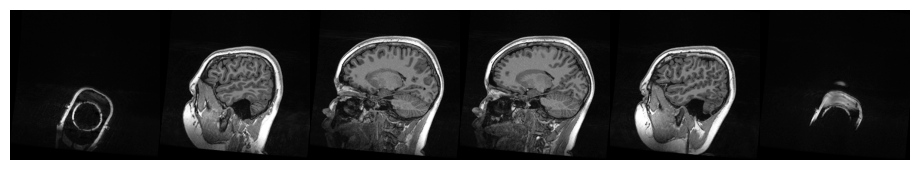

Original T2w:


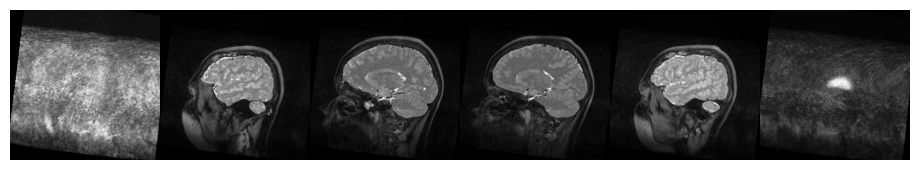

Processed T1 (channel 0):


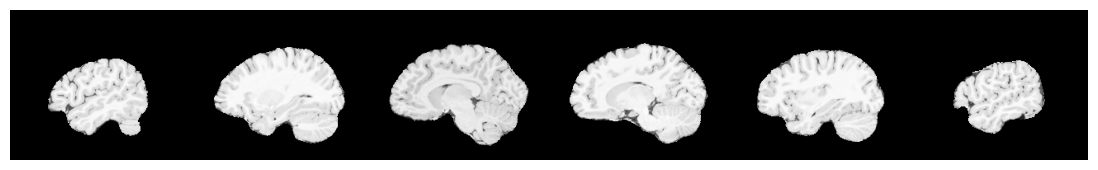

Processed T2 (channel 1):


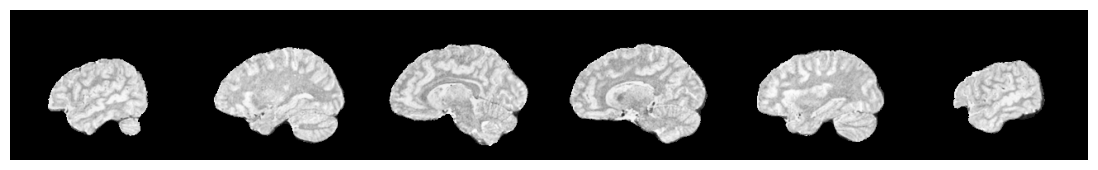


=== Subject 5: NDARINV0N0JE94U ===
Original T1w:


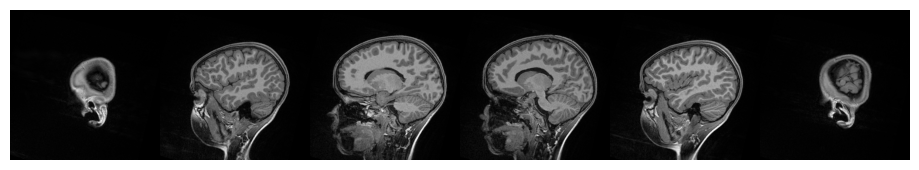

Original T2w:


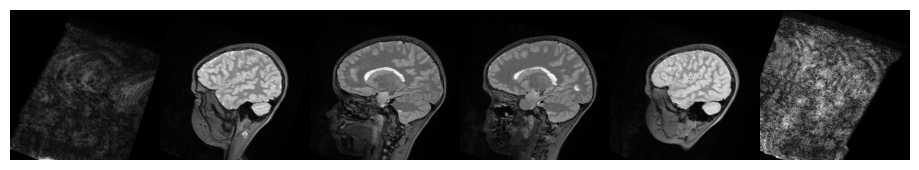

Processed T1 (channel 0):


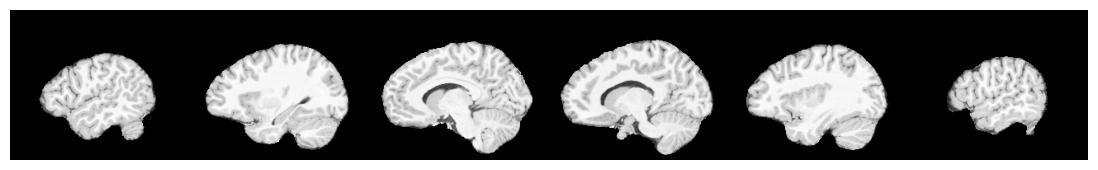

Processed T2 (channel 1):


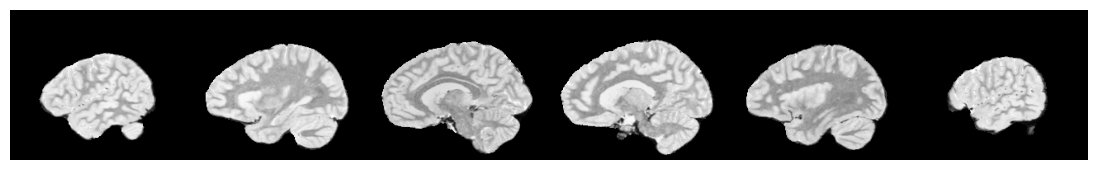


=== Subject 6: NDARINV11THDW9B ===
Original T1w:


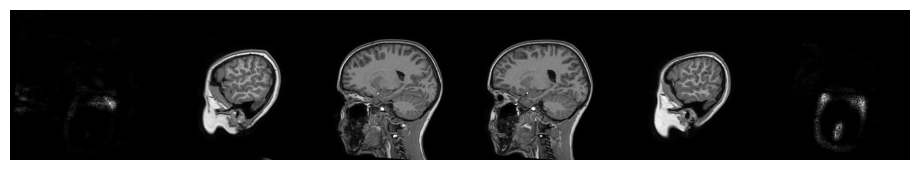

Original T2w:


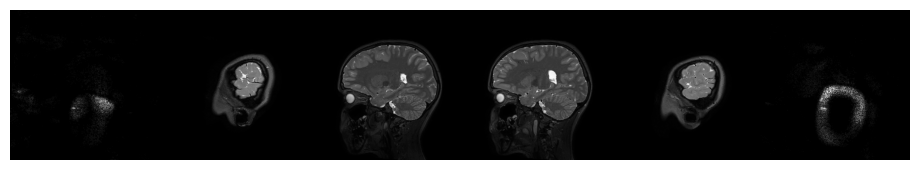

Processed T1 (channel 0):


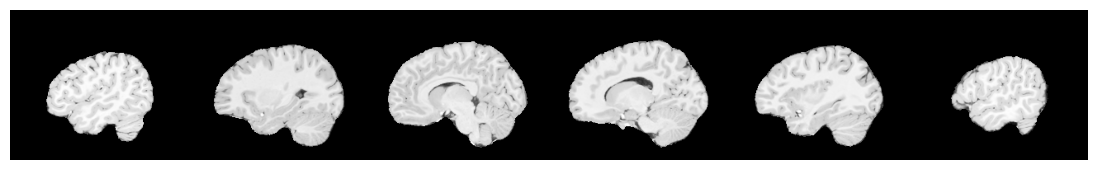

Processed T2 (channel 1):


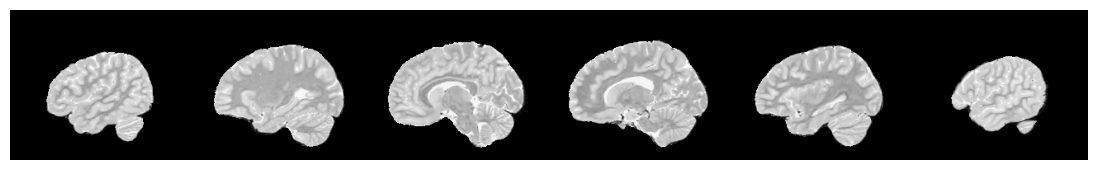


=== Subject 7: NDARINV13BCLD41 ===
Original T1w:


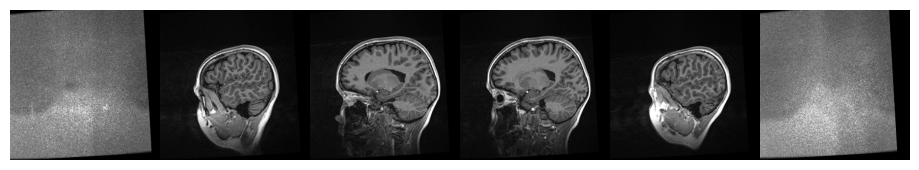

Original T2w:


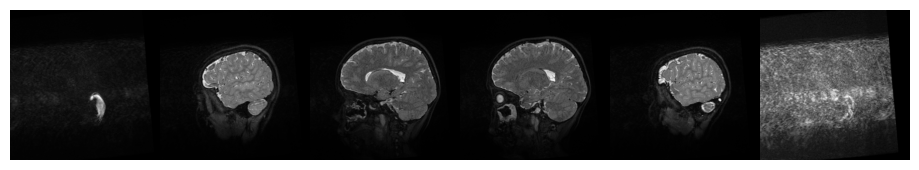

Processed T1 (channel 0):


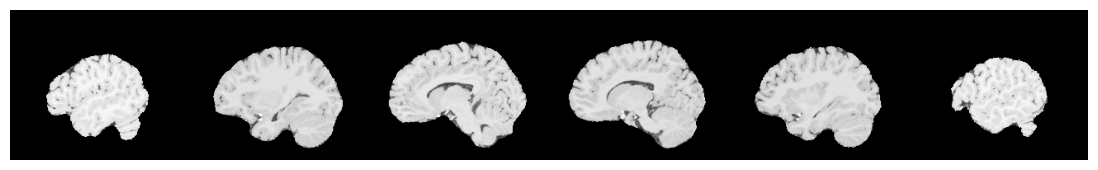

Processed T2 (channel 1):


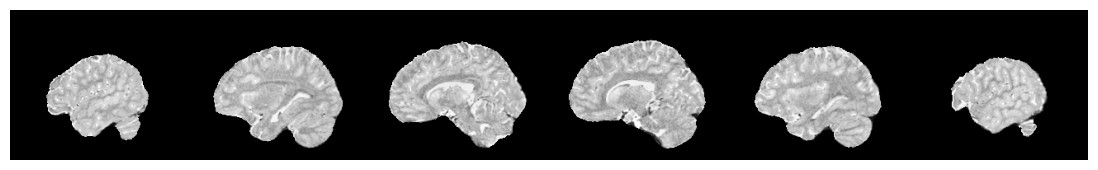


=== Subject 8: NDARINV13FP25D3 ===
Original T1w:


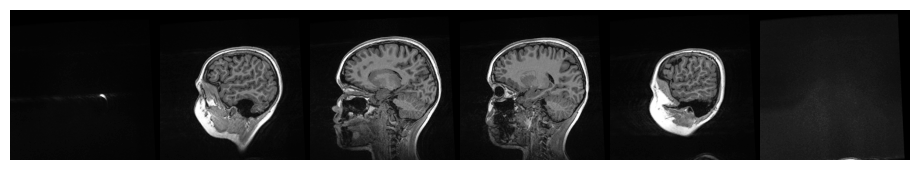

Original T2w:


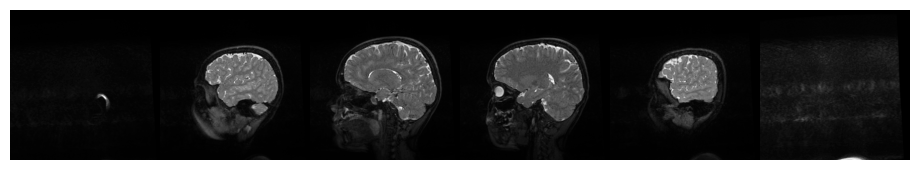

Processed T1 (channel 0):


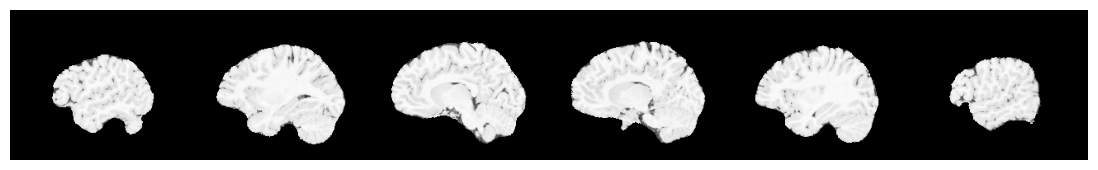

Processed T2 (channel 1):


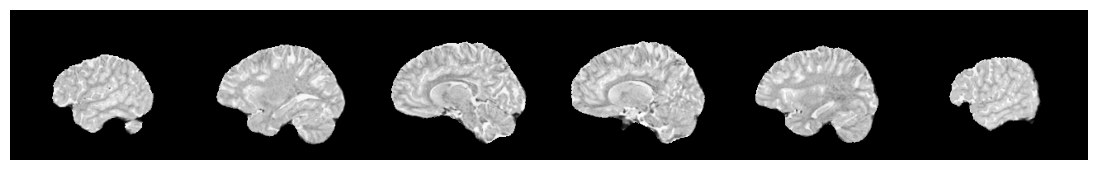


=== Subject 9: NDARINV19GP5HLJ ===
Original T1w:


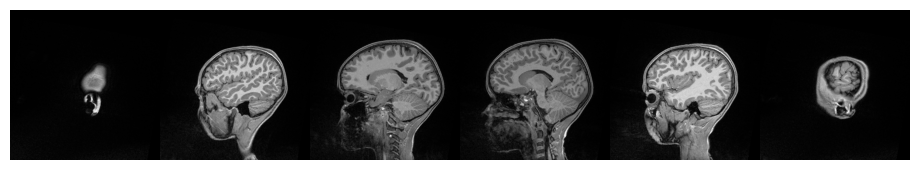

Original T2w:


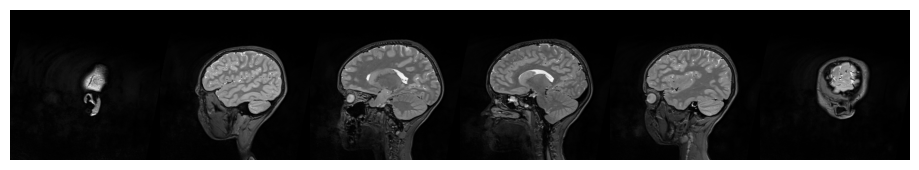

Processed T1 (channel 0):


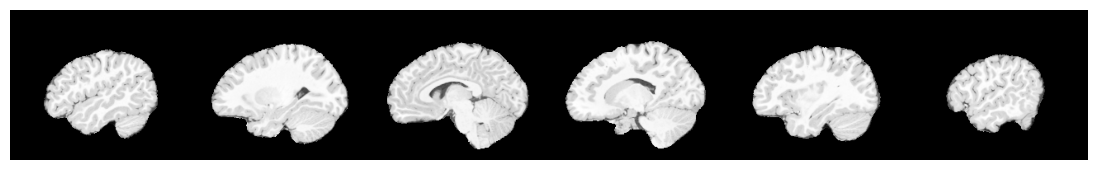

Processed T2 (channel 1):


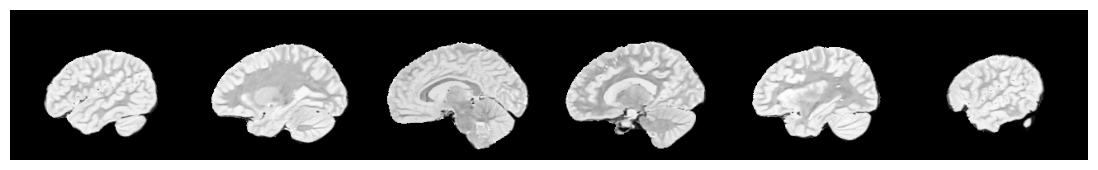


=== Subject 10: NDARINV1ETGGL9R ===
Original T1w:


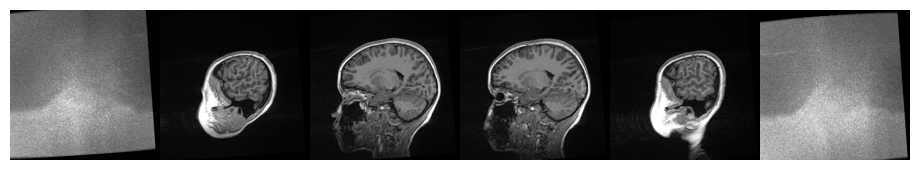

Original T2w:


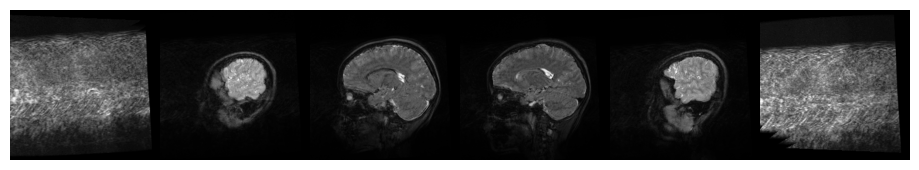

Processed T1 (channel 0):


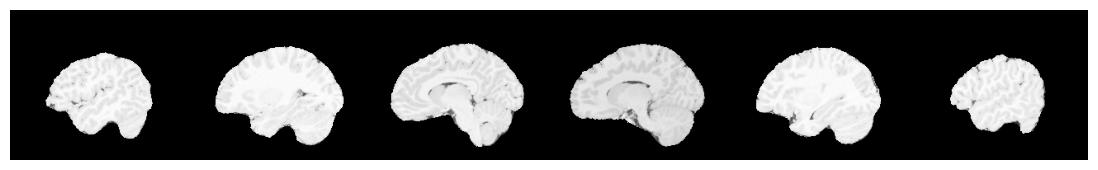

Processed T2 (channel 1):


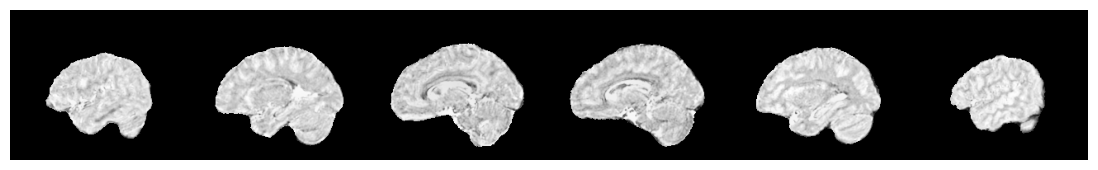


=== Subject 11: NDARINV1F5JEP46 ===
Original T1w:


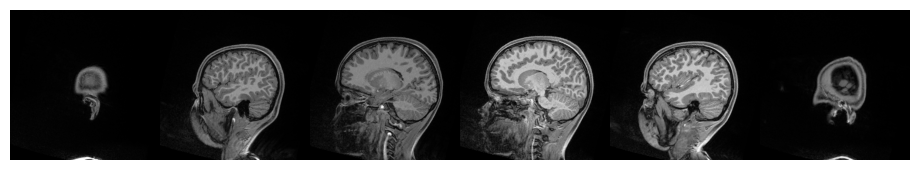

Original T2w:


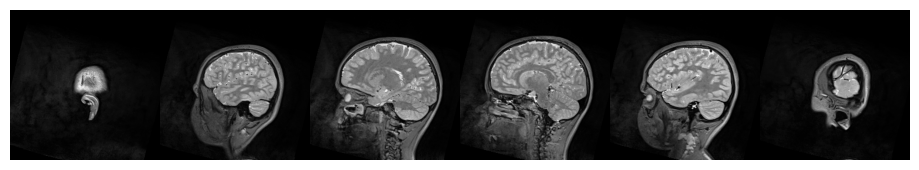

Processed T1 (channel 0):


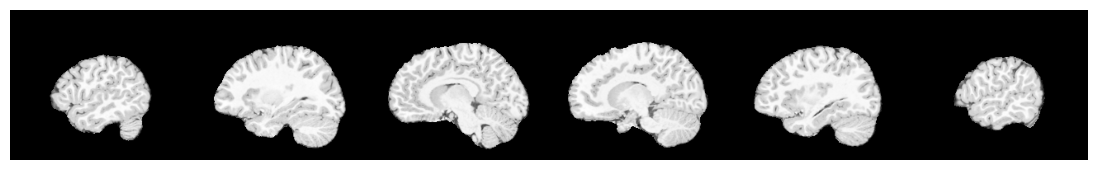

Processed T2 (channel 1):


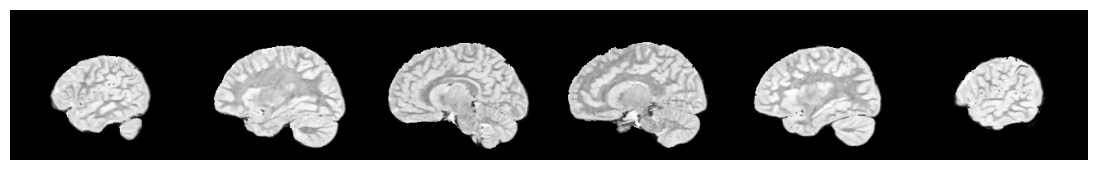

In [1]:
import ants
import os
import matplotlib.pyplot as plt

# Directories
processed_dir = "/BEE/Connectome/ABCD/Users/emre/braintyp/processed_v3"
original_dir = "/BEE/Connectome/ABCD/ImageData/Data_abcd_asd_scr_pos_gz"

# List processed subject IDs
processed_files = sorted([
    f for f in os.listdir(processed_dir) if f.endswith(".nii.gz")
])
subject_ids = [f.replace(".nii.gz", "") for f in processed_files]

# Set which subjects to display (Python index range)
show_indices = slice(0, 40)  # Shows subjects 2 and 3

total = 10

# Loop over selected subjects
for i in range(*show_indices.indices(len(subject_ids))):
    i+=1
    subject_id = subject_ids[i]
    print(f"\n=== Subject {i+1}: {subject_id} ===")

    # Paths
    t1_path = os.path.join(
        original_dir,
        f"sub-{subject_id}",
        "ses-baselineYear1Arm1",
        "anat",
        f"sub-{subject_id}_ses-baselineYear1Arm1_run-01_T1w.nii.gz"
    )
    t2_path = os.path.join(
        original_dir,
        f"sub-{subject_id}",
        "ses-baselineYear1Arm1",
        "anat",
        f"sub-{subject_id}_ses-baselineYear1Arm1_run-01_T2w.nii.gz"
    )
    processed_path = os.path.join(processed_dir, f"{subject_id}.nii.gz")

    # Check if all files exist
    if not (os.path.exists(t1_path) and os.path.exists(t2_path) and os.path.exists(processed_path)):
        print(f"[!] Missing file(s) for subject {subject_id}. Skipping.")
        continue

    # Load images
    t1 = ants.image_read(t1_path)
    t2 = ants.image_read(t2_path)
    processed = ants.image_read(processed_path)

    # Split processed into channels
    processed_channels = ants.split_channels(processed)

    # Plot original and processed images
    print("Original T1w:")
    t1.plot(nslices=6)

    print("Original T2w:")
    t2.plot(nslices=6)

    print("Processed T1 (channel 0):")
    processed_channels[0].plot(nslices=6)

    print("Processed T2 (channel 1):")
    processed_channels[1].plot(nslices=6)


    if i == total:
        break